In [1]:
import numpy as np
from scipy import optimize as op
from matplotlib import pyplot as py
import matplotlib.pyplot as plt
import math as math

# Ex A1

In [70]:
def exercise(U_f,t_f,nbar_f):
    U = U_f
    t = t_f
    nbar = nbar_f
    
    def H(f):
        "Expected value of the hamiltonian"
        f=f
        #navg=1
        Hint = 0.
        Hkin = 0.
        for n in range(9):
                Hint = Hint + U/2*abs(f[n])**2*n(n+1)**2 # Lattice hamiltonian expected value
        for n in range(8):
                Hkin = Hkin + np.conjugate(f[n])*f[n+1]*np.sqrt(n+1) # Kinetic hamiltonian expected value
        return Hint-t*abs(Hkin)**2

    def con_1(f): 
        c1 = 0.
        for n in range(9):
            c1 =  c1 + abs(f[n])**2
        return np.array(c1 - 1.)

    def con_2(f):
        return np.array(f - 1.)

    def con_3(f):
        c3 = 0.
        for n in range(9):
            c3 = c3 + n*abs(f[n])**2
        return np.array(c3 - nbar)
    
    c1 = op.NonlinearConstraint(con_1, 0., 0.)
    c3 = op.NonlinearConstraint(con_3, 0., 0.)

    b = [0., 1.]
    bound=(b,b,b,b,b,b,b,b,b);

    result = op.differential_evolution(H, bounds=bound, constraints = (c1,c3))
    f = np.array(result.x)
    
    return f
    
    


In [72]:

f1=exercise(U_f = 0.,t_f=1.,nbar_f=1.);
f2=exercise(U_f = 0.,t_f=1.,nbar_f=2.);
f3=exercise(U_f = 10.,t_f=1.,nbar_f=1.);
f4=exercise(U_f = 100.,t_f=1.,nbar_f=1.1);
         

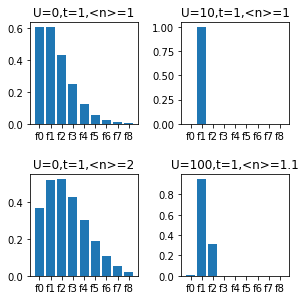

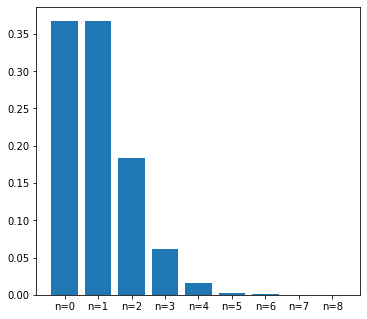

In [103]:
x = ['f0','f1','f2','f3','f4','f5','f6','f7','f8']

fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(left=0.1, bottom=0.02, right=0.9, top=0.9, wspace=0.4, hspace=0.5)

axs[0, 0].bar(x,f1)
axs[0, 0].set_title('U=0,t=1,<n>=1')
axs[1, 0].bar(x,f2)
axs[1, 0].set_title('U=0,t=1,<n>=2')
axs[0, 1].bar(x,f3)
axs[0, 1].set_title('U=10,t=1,<n>=1')
axs[1, 1].bar(x,f4)
axs[1, 1].set_title('U=100,t=1,<n>=1.1')
plt.savefig('exA1.pdf',dpi=200)


b = ['n=0','n=1','n=2','n=3','n=4','n=5','n=6','n=7','n=8']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(b,abs(f1)**2)
plt.savefig('exB.pdf',dpi=300)

# Ex A2

In [53]:
def coherence(f,nbar_f):
    nbar = nbar_f
    g = 0.
    for n in range(7):
        g = g + np.conjugate(f[n])*f[n+1]*np.sqrt(n+1) # Kinetic hamiltonian expected value
    return (abs(g)**2)/float(nbar)
    

In [57]:
t_f=1;
U = np.linspace(0,10,10); 
nbar_f=1;
g1 = np.zeros(10);

for n in range(10):
    f = exercise(U[n],t_f,nbar_f);
    g1[n] = coherence(f,nbar_f);

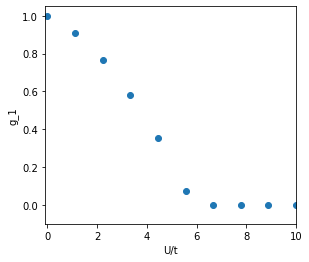

In [101]:
plt.scatter(U,g1)
plt.xlabel('U/t')
plt.ylabel('g_1')
plt.xlim([-0.1,10.])
plt.ylim([-0.1,1.05])
plt.savefig('exB2c.png',dpi=300)

# Ex A3 2 c)

In [59]:
def coherencet(t):
    t=t;
    U=10;
    nm = 1;
    g = 0.;
    hbar=10**(-34);
    for n in range(8):
        g = g+nm**n*np.sqrt(n+1)*np.exp(-U*n*t*1j/hbar)/(np.sqrt(math.factorial(n)*math.factorial(n+1)))
    return np.exp(-2*nm)*(abs(g)**2)

In [1]:
nt=300;
t=np.linspace(0,100,nt);
gt=np.zeros(nt);
for i in range(nt):
    tn=t[i];
    gt[i]=coherencet(tn);



NameError: name 'np' is not defined

Text(0, 0.5, 'g_1(t)')

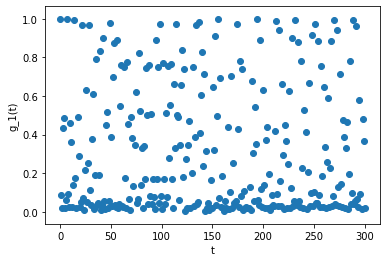

In [61]:
plt.scatter(t,gt)
plt.xlabel('t')
plt.ylabel('g_1(t)')